##1. Train a KNN Classifier on the iris dataset and pring model accuracy.

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Model Accuracy: {accuracy:.2f}")  # Print Accuracy


KNN Model Accuracy: 1.00


##2. Train a KNN Regressor on a synthetic dataset and evaluate using Mean Squared Error (MSE).


In [4]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=200, n_features=3, noise=15, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

y_pred = knn_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"KNN Regressor Mean Squared Error: {mse:.2f}")


KNN Regressor Mean Squared Error: 1449.29


##3. Train a KNN Classifier using different distance metrics (Euclidean and Manhattan) and compare accuracy.


In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


knn_euclidean = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)
accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)


knn_manhattan = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)


print(f"KNN with Euclidean Distance Accuracy: {accuracy_euclidean * 100:.2f}%")
print(f"KNN with Manhattan Distance Accuracy: {accuracy_manhattan * 100:.2f}%")


KNN with Euclidean Distance Accuracy: 100.00%
KNN with Manhattan Distance Accuracy: 100.00%


##4. Train a KNN Classifier with different values of K and visualize decision boundaries.

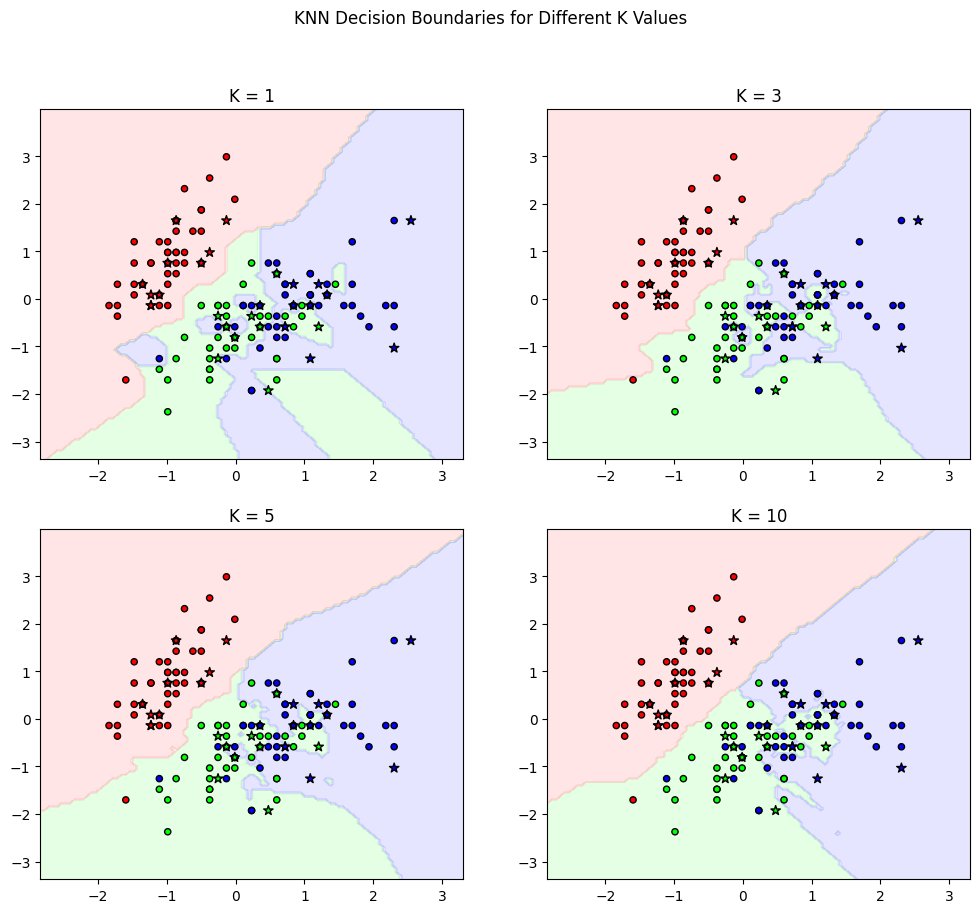

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

iris = load_iris()
X = iris.data[:, :2]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

k_values = [1, 3, 5, 10]
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure(figsize=(12, 10))
for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(2, 2, i + 1)
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.3)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=50, marker='*')
    plt.title(f'K = {k}')

plt.suptitle("KNN Decision Boundaries for Different K Values")
plt.show()


##5. Apply Feature Scaling before training a KNN model and compare results with unscaled data.

In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_unscaled = KNeighborsClassifier(n_neighbors=3)
knn_unscaled.fit(X_train, y_train)
y_pred_unscaled = knn_unscaled.predict(X_test)
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=3)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

print(f'Accuracy without Feature Scaling: {accuracy_unscaled * 100:.2f}%')
print(f'Accuracy with Feature Scaling: {accuracy_scaled * 100:.2f}%')


Accuracy without Feature Scaling: 100.00%
Accuracy with Feature Scaling: 100.00%


##6. Train a PCA model on synthetic data and print the explained variance ratio for each component.


In [8]:
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
import numpy as np

X, _ = make_classification(n_samples=200, n_features=5, random_state=42)

pca = PCA(n_components=5)
pca.fit(X)

explained_variance = pca.explained_variance_ratio_

for i, var in enumerate(explained_variance):
    print(f'Principal Component {i+1}: {var:.4f}')


Principal Component 1: 0.4814
Principal Component 2: 0.3372
Principal Component 3: 0.1814
Principal Component 4: 0.0000
Principal Component 5: 0.0000


##7. Apply PCA before training a KNN Classifier and compare accuracy with and without PCA.

In [9]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
accuracy_without_pca = accuracy_score(y_test, y_pred)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
accuracy_with_pca = accuracy_score(y_test, y_pred_pca)

print(f'Accuracy without PCA: {accuracy_without_pca * 100:.2f}%')
print(f'Accuracy with PCA: {accuracy_with_pca * 100:.2f}%')

Accuracy without PCA: 100.00%
Accuracy with PCA: 93.33%


##8. Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV.


In [10]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {'n_neighbors': range(1, 21), 'metric': ['euclidean', 'manhattan']}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test_scaled)
best_accuracy = accuracy_score(y_test, y_pred_best)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Accuracy: {best_accuracy * 100:.2f}%')

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 8}
Best Accuracy: 100.00%


##9. Train a KNN Classifier and check the number of misclassified samples.


In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

misclassified_samples = (y_test != y_pred).sum()
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Number of misclassified samples: {misclassified_samples}')

Accuracy: 100.00%
Number of misclassified samples: 0


##10. Train a PCA model and visualize the cumulative explained variance.


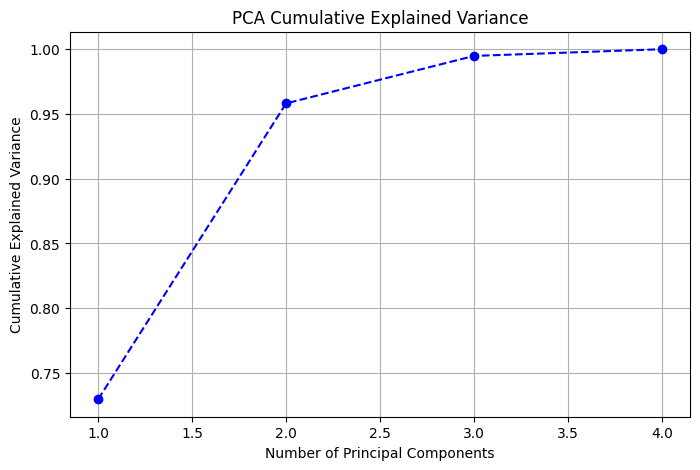

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Cumulative Explained Variance')
plt.grid()
plt.show()

##11. Train a KNN Classifier using different values of the weights parameter (uniform vs. distance) and compare accuracy.

In [13]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_uniform = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_uniform.fit(X_train_scaled, y_train)
y_pred_uniform = knn_uniform.predict(X_test_scaled)
accuracy_uniform = accuracy_score(y_test, y_pred_uniform)

knn_distance = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_distance.fit(X_train_scaled, y_train)
y_pred_distance = knn_distance.predict(X_test_scaled)
accuracy_distance = accuracy_score(y_test, y_pred_distance)

print(f'Accuracy with uniform weights: {accuracy_uniform * 100:.2f}%')
print(f'Accuracy with distance-based weights: {accuracy_distance * 100:.2f}%')

Accuracy with uniform weights: 100.00%
Accuracy with distance-based weights: 100.00%


##12. Train a KNN Regressor and analyze the effect of different K values on performance.


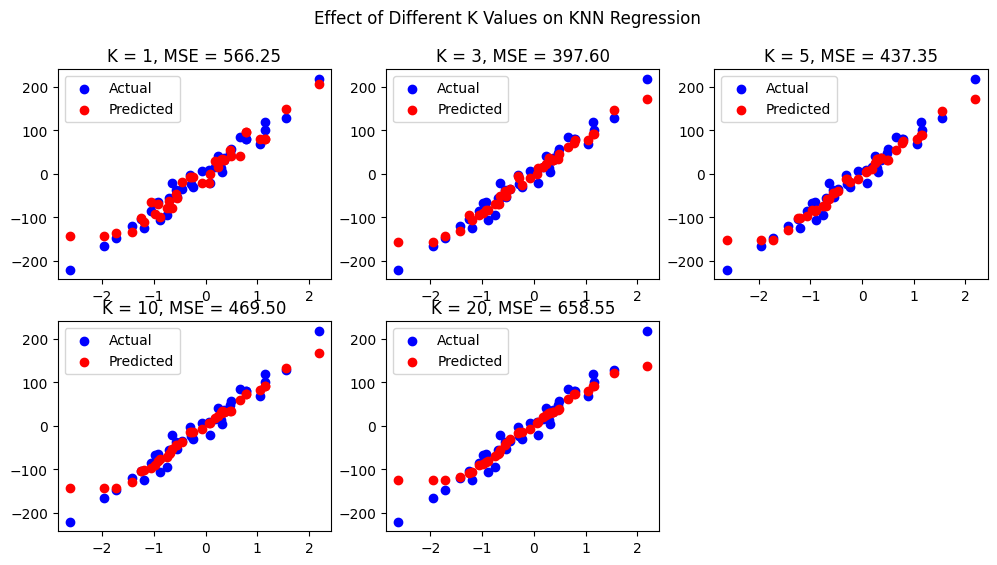

K = 1, Mean Squared Error = 566.25
K = 3, Mean Squared Error = 397.60
K = 5, Mean Squared Error = 437.35
K = 10, Mean Squared Error = 469.50
K = 20, Mean Squared Error = 658.55


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=200, n_features=1, noise=15, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_values = [1, 3, 5, 10, 20]
mse_scores = []

plt.figure(figsize=(12, 6))
for i, k in enumerate(k_values):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

    plt.subplot(2, 3, i + 1)
    plt.scatter(X_test, y_test, color='blue', label='Actual')
    plt.scatter(X_test, y_pred, color='red', label='Predicted')
    plt.title(f'K = {k}, MSE = {mse:.2f}')
    plt.legend()

plt.suptitle('Effect of Different K Values on KNN Regression')
plt.show()

for k, mse in zip(k_values, mse_scores):
    print(f'K = {k}, Mean Squared Error = {mse:.2f}')

##13. Implement KNN Imputation for handling missing values in a dataset.

In [15]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer

data = {
    'Feature1': [1.0, 2.0, np.nan, 4.0, 5.0],
    'Feature2': [2.5, np.nan, 3.5, 4.5, 5.5],
    'Feature3': [np.nan, 1.0, 2.0, 3.0, 4.0]
}
df = pd.DataFrame(data)

print("Original Dataset with Missing Values:")
print(df)


imputer = KNNImputer(n_neighbors=2)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print("\nDataset after KNN Imputation:")
print(df_imputed)

Original Dataset with Missing Values:
   Feature1  Feature2  Feature3
0       1.0       2.5       NaN
1       2.0       NaN       1.0
2       NaN       3.5       2.0
3       4.0       4.5       3.0
4       5.0       5.5       4.0

Dataset after KNN Imputation:
   Feature1  Feature2  Feature3
0       1.0       2.5       1.5
1       2.0       3.0       1.0
2       1.5       3.5       2.0
3       4.0       4.5       3.0
4       5.0       5.5       4.0


##14. Train a PCA model and visualize the data projection onto the first two principal components.

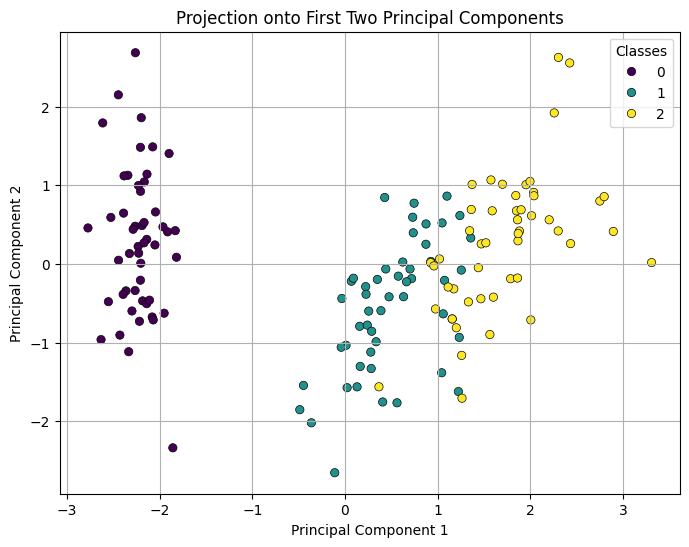

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Projection onto First Two Principal Components')
plt.legend(title='Classes')
plt.grid()
plt.show()

##15. Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance.


In [17]:
import numpy as np
import time
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_kd = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')
start_kd = time.time()
knn_kd.fit(X_train_scaled, y_train)
y_pred_kd = knn_kd.predict(X_test_scaled)
kd_time = time.time() - start_kd
accuracy_kd = accuracy_score(y_test, y_pred_kd)

knn_ball = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')
start_ball = time.time()
knn_ball.fit(X_train_scaled, y_train)
y_pred_ball = knn_ball.predict(X_test_scaled)
ball_time = time.time() - start_ball
accuracy_ball = accuracy_score(y_test, y_pred_ball)

print(f'KD Tree Accuracy: {accuracy_kd * 100:.2f}% | Training Time: {kd_time:.4f} sec')
print(f'Ball Tree Accuracy: {accuracy_ball * 100:.2f}% | Training Time: {ball_time:.4f} sec')


KD Tree Accuracy: 100.00% | Training Time: 0.0097 sec
Ball Tree Accuracy: 100.00% | Training Time: 0.0099 sec


##16. Train a PCA model on a high-dimensional dataset and visualize the Scree plot.

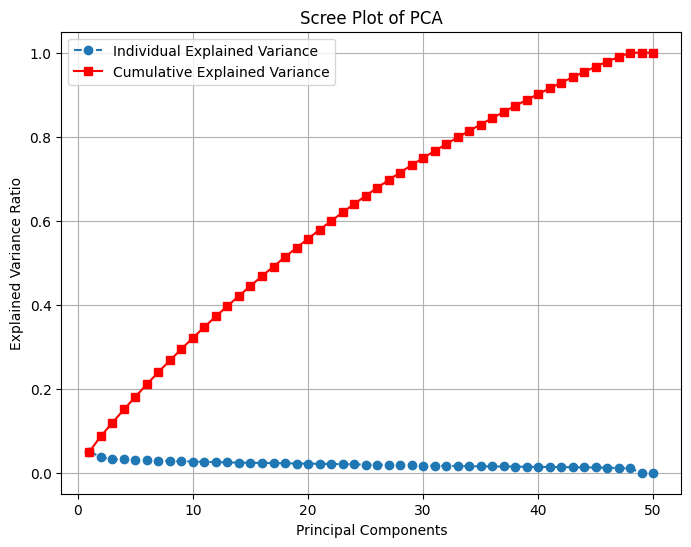

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

X, _ = make_classification(n_samples=500, n_features=50, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', label='Individual Explained Variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='s', linestyle='-', label='Cumulative Explained Variance', color='red')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot of PCA')
plt.legend()
plt.grid()
plt.show()

##17. Train a KNN Classifier and evaluate performance using Precision, Recall, and F1-Score.


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

Precision: 1.00
Recall: 1.00
F1-Score: 1.00


##18. Train a PCA model and analyze the effect of different numbers of components on accuracy.


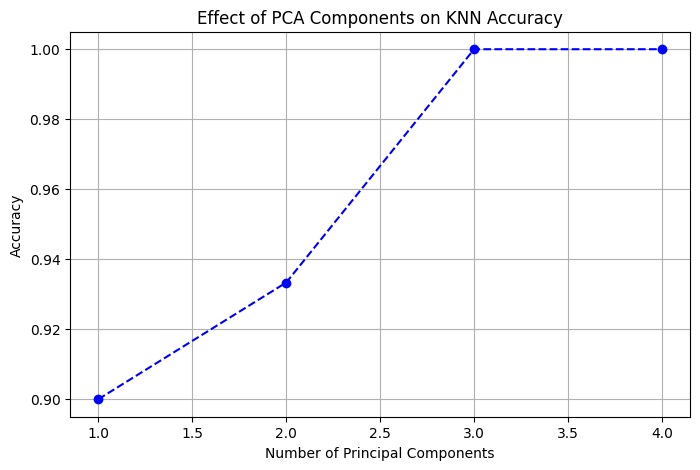

Number of Components: 1, Accuracy: 90.00%
Number of Components: 2, Accuracy: 93.33%
Number of Components: 3, Accuracy: 100.00%
Number of Components: 4, Accuracy: 100.00%


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

components_range = [1, 2, 3, 4]
accuracy_scores = []

for n in components_range:
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_pca, y_train)
    y_pred = knn.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(8, 5))
plt.plot(components_range, accuracy_scores, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.title('Effect of PCA Components on KNN Accuracy')
plt.grid()
plt.show()

for n, acc in zip(components_range, accuracy_scores):
    print(f'Number of Components: {n}, Accuracy: {acc * 100:.2f}%')


##19. Train a KNN Classifier with different leaf_size values and compare accuracy.


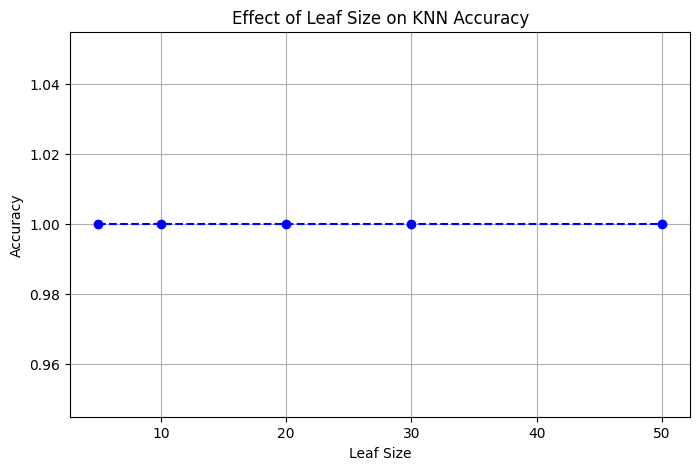

Leaf Size: 5, Accuracy: 100.00%
Leaf Size: 10, Accuracy: 100.00%
Leaf Size: 20, Accuracy: 100.00%
Leaf Size: 30, Accuracy: 100.00%
Leaf Size: 50, Accuracy: 100.00%


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

leaf_size_values = [5, 10, 20, 30, 50]
accuracy_scores = []

for leaf_size in leaf_size_values:
    knn = KNeighborsClassifier(n_neighbors=5, leaf_size=leaf_size)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(8, 5))
plt.plot(leaf_size_values, accuracy_scores, marker='o', linestyle='--', color='b')
plt.xlabel('Leaf Size')
plt.ylabel('Accuracy')
plt.title('Effect of Leaf Size on KNN Accuracy')
plt.grid()
plt.show()

for leaf_size, acc in zip(leaf_size_values, accuracy_scores):
    print(f'Leaf Size: {leaf_size}, Accuracy: {acc * 100:.2f}%')


##20. Train a PCA model and visualize how data points are transformed before and after PCA.


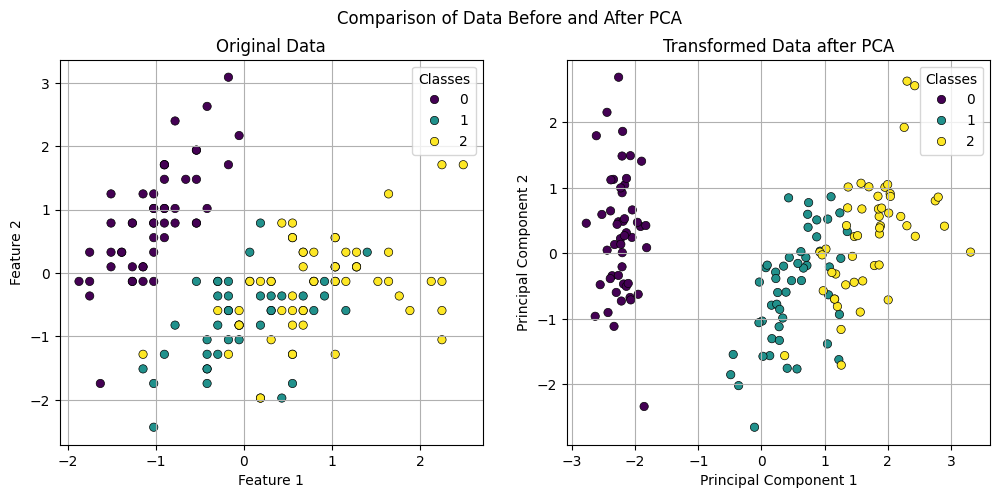

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y, palette='viridis', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Data')
plt.legend(title='Classes')
plt.grid()

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Transformed Data after PCA')
plt.legend(title='Classes')
plt.grid()

plt.suptitle('Comparison of Data Before and After PCA')
plt.show()

##21. Train a KNN Classifier on a real-world dataset (Wine dataset) and print classification report.


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

wine = load_wine()
X = wine.data
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.86      0.92        14
           2       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



##22. Train a KNN Regressor and analyze the effect of different distance metrics on prediction error.


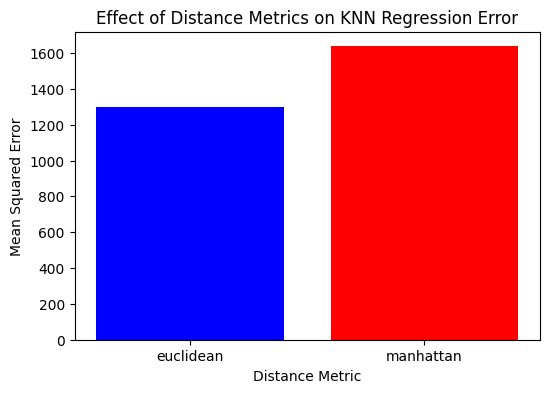

Distance Metric: euclidean, Mean Squared Error: 1297.6457
Distance Metric: manhattan, Mean Squared Error: 1636.9161


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=500, n_features=5, noise=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

distance_metrics = ['euclidean', 'manhattan']
mse_scores = {}

for metric in distance_metrics:
    knn = KNeighborsRegressor(n_neighbors=5, metric=metric)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores[metric] = mse

plt.figure(figsize=(6, 4))
plt.bar(mse_scores.keys(), mse_scores.values(), color=['blue', 'red'])
plt.xlabel('Distance Metric')
plt.ylabel('Mean Squared Error')
plt.title('Effect of Distance Metrics on KNN Regression Error')
plt.show()

for metric, mse in mse_scores.items():
    print(f'Distance Metric: {metric}, Mean Squared Error: {mse:.4f}')


##23. Train a KNN Classifier and evaluate using ROC-AUC score.


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

wine = load_wine()
X = wine.data
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_prob = knn.predict_proba(X_test_scaled)

y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
roc_auc_scores = []

for i in range(y_test_binarized.shape[1]):
    roc_auc = roc_auc_score(y_test_binarized[:, i], y_prob[:, i])
    roc_auc_scores.append(roc_auc)

for i, score in enumerate(roc_auc_scores):
    print(f'Class {i} ROC-AUC Score: {score:.4f}')

print(f'Average ROC-AUC Score: {np.mean(roc_auc_scores):.4f}')

Class 0 ROC-AUC Score: 1.0000
Class 1 ROC-AUC Score: 0.9984
Class 2 ROC-AUC Score: 1.0000
Average ROC-AUC Score: 0.9995


##24. Train a PCA model and visualize the variance captured by each principal component.


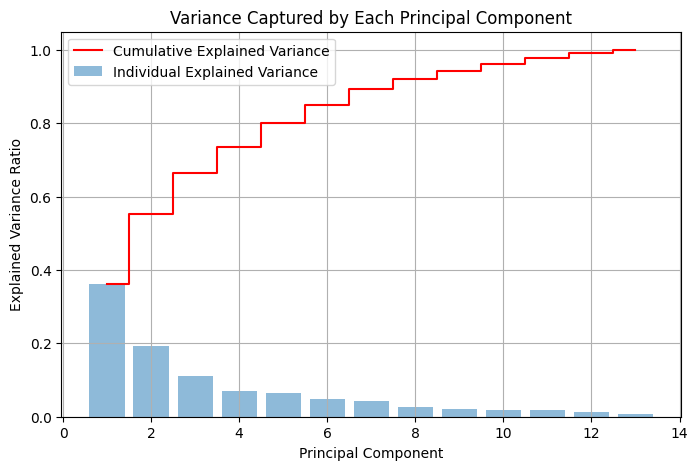

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

wine = load_wine()
X = wine.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Individual Explained Variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative Explained Variance', color='red')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Variance Captured by Each Principal Component')
plt.legend()
plt.grid()
plt.show()

##25. Train a KNN Classifier and perform feature selection before training.


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

wine = load_wine()
X = wine.data
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

selector = SelectKBest(score_func=f_classif, k=5)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_selected, y_train)
y_pred = knn.predict(X_test_selected)

print("KNN Classification Report after Feature Selection:")
print(classification_report(y_test, y_pred))


KNN Classification Report after Feature Selection:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



##26. Train a PCA model and visualize the data reconstruction error after reducing dimensions.


Reconstruction Error: 0.1984


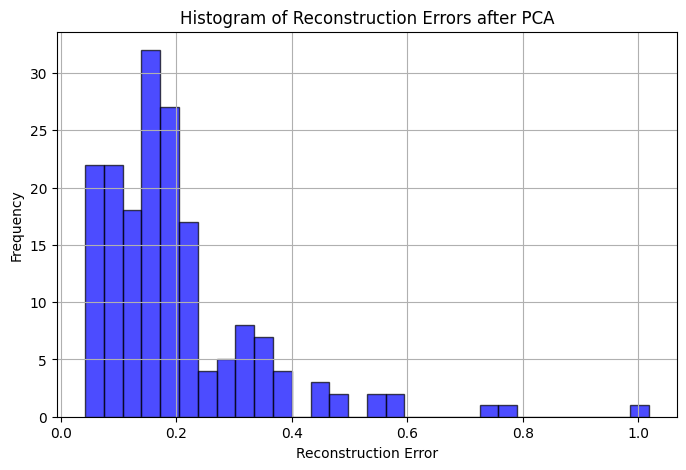

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

wine = load_wine()
X = wine.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)
X_reconstructed = pca.inverse_transform(X_pca)

reconstruction_error = mean_squared_error(X_scaled, X_reconstructed)
print(f'Reconstruction Error: {reconstruction_error:.4f}')

errors = np.mean((X_scaled - X_reconstructed) ** 2, axis=1)
plt.figure(figsize=(8, 5))
plt.hist(errors, bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Histogram of Reconstruction Errors after PCA')
plt.grid()
plt.show()


##27. Train a KNN Classifier and visualize the decision boundary.


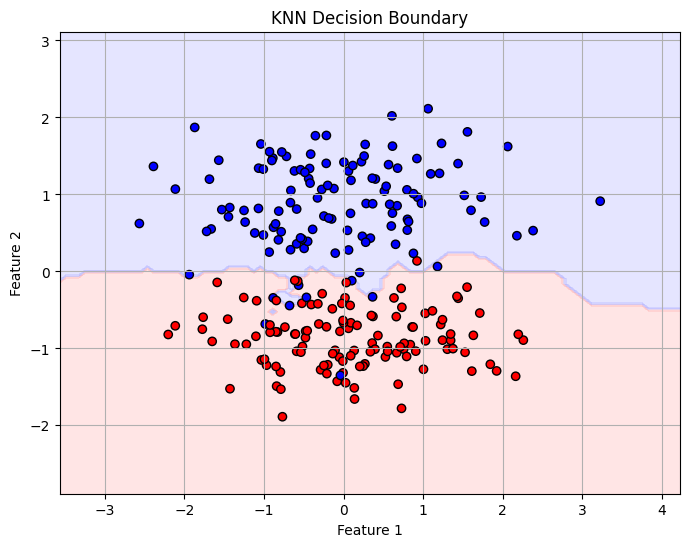

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

X, y = make_classification(n_samples=300, n_features=2, n_classes=2, n_clusters_per_class=1,
                            n_informative=1, n_redundant=0, n_repeated=0, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, edgecolor='k', cmap=ListedColormap(['#FF0000', '#0000FF']))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Decision Boundary')
plt.grid()
plt.show()

##28. Train a PCA model and analyze the effect of different numbers of components on data variance.


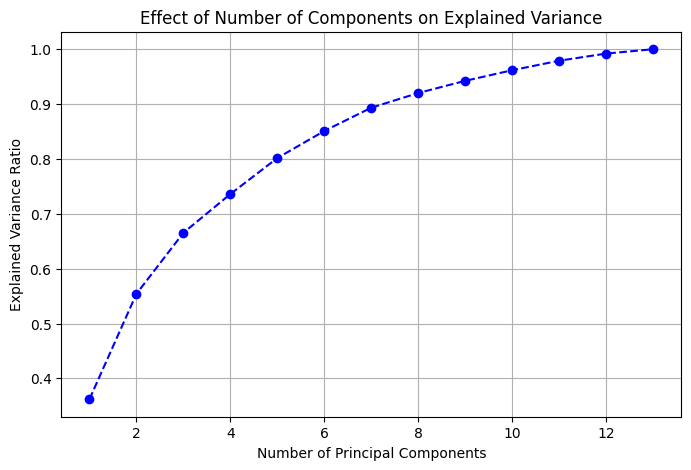

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

wine = load_wine()
X = wine.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

num_components = range(1, X.shape[1] + 1)
explained_variances = []

for n in num_components:
    pca = PCA(n_components=n)
    pca.fit(X_scaled)
    explained_variances.append(sum(pca.explained_variance_ratio_))

plt.figure(figsize=(8, 5))
plt.plot(num_components, explained_variances, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Effect of Number of Components on Explained Variance')
plt.grid()
plt.show()